# Capstone 3 - Data Wrangling

Can we predict the electricity load for three cities of Panama, considering meteorologic conditions, holidays, and school schedule?

In [82]:
# Modules importation
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Importing the dataset
data = pd.read_csv(r'C:\Users\laurence\OneDrive\Data Science\Capstone 3\Data\continuous dataset.csv')

In [84]:
# Visualisation of the dataset
data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [85]:
# Verification of features, missing values and data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48048 entries, 0 to 48047
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    48048 non-null  object 
 1   nat_demand  48048 non-null  float64
 2   T2M_toc     48048 non-null  float64
 3   QV2M_toc    48048 non-null  float64
 4   TQL_toc     48048 non-null  float64
 5   W2M_toc     48048 non-null  float64
 6   T2M_san     48048 non-null  float64
 7   QV2M_san    48048 non-null  float64
 8   TQL_san     48048 non-null  float64
 9   W2M_san     48048 non-null  float64
 10  T2M_dav     48048 non-null  float64
 11  QV2M_dav    48048 non-null  float64
 12  TQL_dav     48048 non-null  float64
 13  W2M_dav     48048 non-null  float64
 14  Holiday_ID  48048 non-null  int64  
 15  holiday     48048 non-null  int64  
 16  school      48048 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 6.2+ MB


## Preliminary comments

- data.datetime is an object, all other features are floats or integers.
- There is no missing values.
- Columns names are cryptic.
    - Following Net comment on kaggle, column meaning is: 
        - nat_demand: National electricity load
        - T2M_toc: Temperature at 2 meters, for Tocumen, Panama City
        - QV2M_toc: Relative humidity at 2 meters, for Tocumen, Panama City
        - TQL_toc: Liquid precipitation, for Tocumen, Panama City
        - W2M_toc: Wind speed at 2 meters, for Tocumen, Panama City
        - T2M_san: Temperature at 2 meters, for Santiago City
        - QV2M_san: Relative humidity at 2 meters, for Santiago City
        - TQL_san: Liquid precipitation, for Santiago City
        - W2M_san: Wind speed at 2 meters, for Santiago City
        - T2M_dav: Temperature at 2 meters, for David City
        - QV2M_dav: Relative humidity at 2 meters, for David City
        - TQL_dav: Liquid precipitation, for David City
        - W2M_dav: Wind speed at 2 meters, for David City
        - Holiday_ID: Unique identification number integer
        - holiday: Holiday binary indicator (1=holiday, 0=regular day)
        - school: School period binary indicator (1=school, 0=vacations)
- data.Holiday_ID, data.holiday and data.school are categoriacal
- We don't have access to unit information, but we assume that:
    - Electricity load: GW.h
    - Temperature: °C
    - Relative humidity: %
    - Liquid precipitation: mm
    - wind speed: m/s

In [86]:
# Changing column names to be more meaningful
data = data.rename({'nat_demand': 'nat_elec_load', 'T2M_toc': 't_toc', 'QV2M_toc': 'h_toc', 'TQL_toc': 'p_toc', 
                    'TQL_toc': 'p_toc', 'W2M_toc': 'ws_toc', 'T2M_san': 't_san', 'QV2M_san': 'h_san', 'TQL_san': 'p_san', 
                    'TQL_san': 'p_san', 'W2M_san': 'ws_san', 'T2M_dav': 't_dav', 'QV2M_dav': 'h_dav', 'TQL_dav': 'p_dav', 
                    'TQL_dav': 'p_dav', 'W2M_dav': 'ws_dav', 'Holiday_ID': 'holiday_ID'}, axis=1)

In [87]:
# Changing data type of data.datetime 
data.datetime = pd.to_datetime(data.datetime)

In [88]:
# Changing integer data types into floats to facilitate modeling
data.holiday_ID = data.holiday_ID.astype('float')
data.holiday = data.holiday.astype('float')
data.school = data.school.astype('float')

In [89]:
# Data type verification
data.dtypes

datetime         datetime64[ns]
nat_elec_load           float64
t_toc                   float64
h_toc                   float64
p_toc                   float64
ws_toc                  float64
t_san                   float64
h_san                   float64
p_san                   float64
ws_san                  float64
t_dav                   float64
h_dav                   float64
p_dav                   float64
ws_dav                  float64
holiday_ID              float64
holiday                 float64
school                  float64
dtype: object

In [90]:
# Verifing if there is duplicated data (multiple entry for the same date)
data.datetime.is_unique

True

In [91]:
# Basics statistics for all columns
data.describe()

,nat_elec_load,t_toc,h_toc,p_toc,ws_toc,t_san,h_san,p_san,ws_san,t_dav,h_dav,p_dav,ws_dav,holiday_ID,holiday,school
count,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
mean,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,0.021066,0.477783,10.288902,22.000000,1.000000,1.000000


In [92]:
# Verification of the time period recorded.
start = min(d for d in data.datetime)
end = max(d for d in data.datetime)

print('Data are recorded from', start, 'to', end, 'for a total of 48 048 entries.')

Data are recorded from 2015-01-03 01:00:00 to 2020-06-27 00:00:00 for a total of 48 048 entries.


In [93]:
# Setting the date as the index
data = data.set_index("datetime")

In [94]:
# Visualization of the modified data set
data.head()

,nat_elec_load,t_toc,h_toc,p_toc,ws_toc,t_san,h_san,p_san,ws_san,t_dav,h_dav,p_dav,ws_dav,holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0.0,0.0,0.0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0.0,0.0,0.0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0.0,0.0,0.0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0.0,0.0,0.0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0.0,0.0,0.0


array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

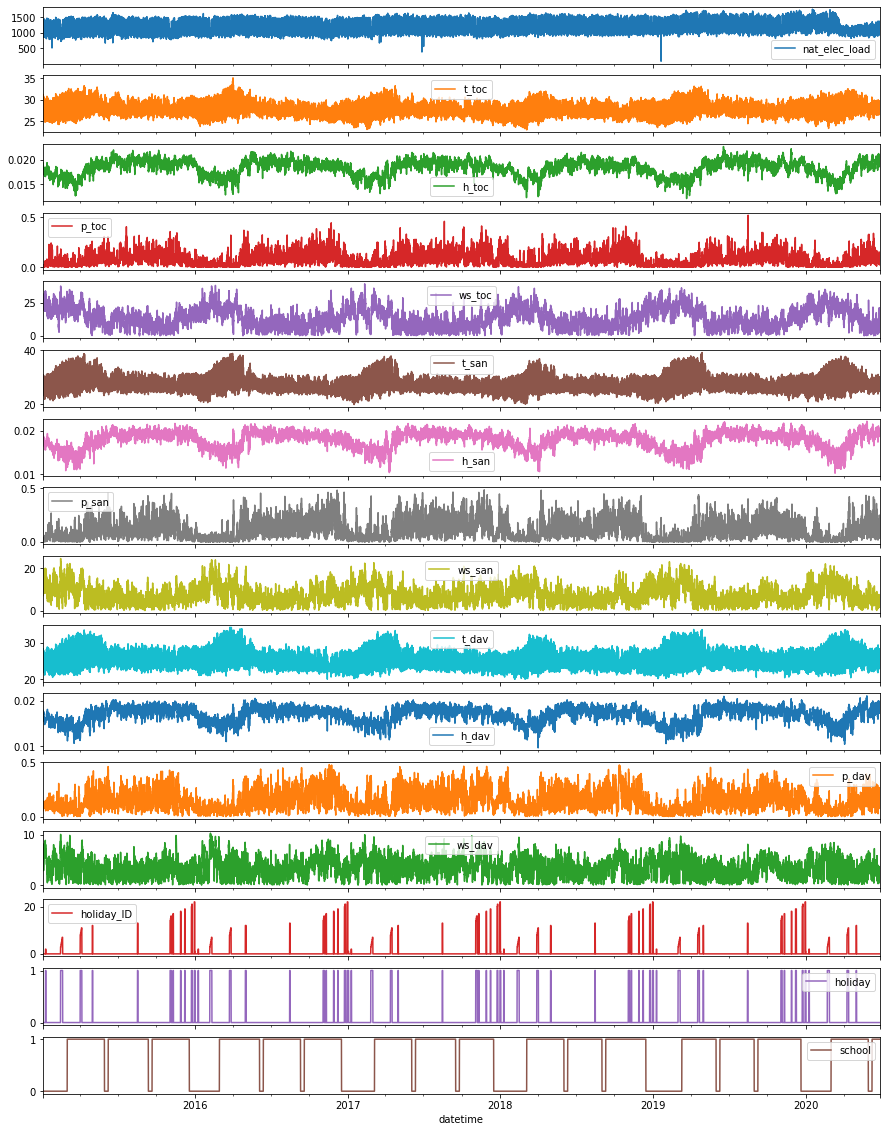

In [95]:
# Looking at the data individually to see if there is any outliers.
data.plot.line(subplots = True, figsize=(15, 20))

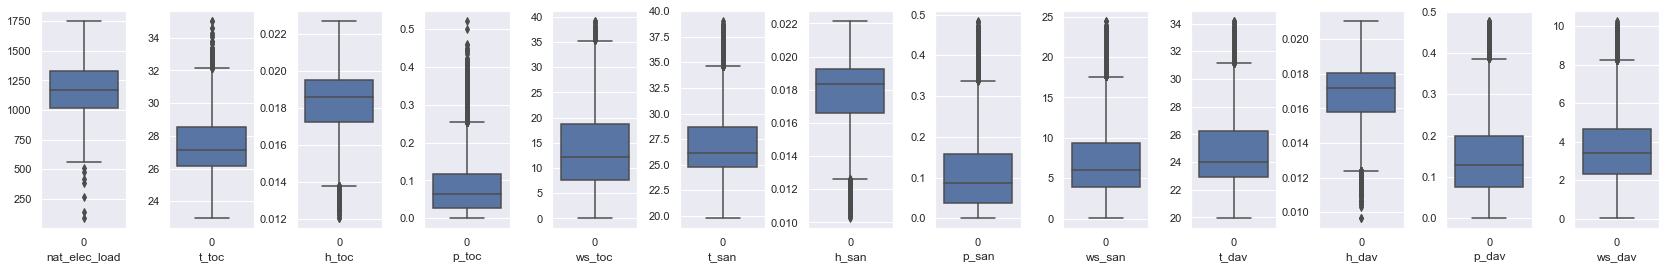

In [119]:
# Looking at outsiders
fig, ax = plt.subplots(1, 13, figsize=(29, 4))
plt.subplots_adjust(wspace=0.5)

sns.boxplot(data=data['nat_elec_load'], ax=ax[0])
ax[0].set_xlabel('nat_elec_load')

sns.boxplot(data=data['t_toc'], ax=ax[1])
ax[1].set_xlabel('t_toc')

sns.boxplot(data=data['h_toc'], ax=ax[2])
ax[2].set_xlabel('h_toc')

sns.boxplot(data=data['p_toc'], ax=ax[3])
ax[3].set_xlabel('p_toc')

sns.boxplot(data=data['ws_toc'], ax=ax[4])
ax[4].set_xlabel('ws_toc')

sns.boxplot(data=data['t_san'], ax=ax[5])
ax[5].set_xlabel('t_san')

sns.boxplot(data=data['h_san'], ax=ax[6])
ax[6].set_xlabel('h_san')

sns.boxplot(data=data['p_san'], ax=ax[7])
ax[7].set_xlabel('p_san')

sns.boxplot(data=data['ws_san'], ax=ax[8])
ax[8].set_xlabel('ws_san')

sns.boxplot(data=data['t_dav'], ax=ax[9])
ax[9].set_xlabel('t_dav')

sns.boxplot(data=data['h_dav'], ax=ax[10])
ax[10].set_xlabel('h_dav')

sns.boxplot(data=data['p_dav'], ax=ax[11])
ax[11].set_xlabel('p_dav')

sns.boxplot(data=data['ws_dav'], ax=ax[12])
ax[12].set_xlabel('ws_dav')
    
plt.show()

## About the outliers

- All features have "outliers".
- The very low values in nat_elec_load may indicate systeme failure.
- 'Outliers' seems to be coherent throughout the 3 cities and are probably not aberrant values. Hence no value should be discard for the moment.

In [97]:
# Saving data
data.to_csv('capstone3_data_wrangled.csv', index=False)